## Project: Wrangle and Analyze Data

There is a twitter account that posts about dogs. We want to have a close look about what dogs, how active the account is and how the reactions to the account are.

## Table of Contents
- [Gather Data](#gather)
- [Assess Data](#assess)
- [Clean Data](#clean)
- [Analyze Data](#analyze)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests
import os
import json

<a id='gather'></a>
### Gather Data

Data from 3 different sources cobined into one larga DataFrame

In [2]:
#importing twitter_archive_enhanced.csv 
df_archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

In [3]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [54]:
# Predictions of dog breeds
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    response = requests.get(url)
    file.write(response.content)
    
# Create dataframe from TSV
df_images = pd.read_csv('image-predictions.tsv', delimiter = '\t')
df_images.set_index("tweet_id", inplace = True)

In [55]:
df_images.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_fail = {}
with open('tweet_json.txt', 'w') as outfile:
    for idx in list(df_archive.tweet_id):
        try:
            tweet_status = api.get_status(idx, tweet_mode='extended')     
            json.dump(tweet_status._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            tweet_fail[idx] = e

In [56]:
#Reading the text file in json format
with open('tweet_json.txt') as infile:
    df_tweets = pd.DataFrame((json.loads(line) for line in infile),
                columns = ['id','favorite_count', 'retweet_count'])

#change column names
df_tweets.columns = ['tweet_id', 'favorites', 'retweets'] 
#use tweet tweet_id column as index
df_tweets.set_index('tweet_id', inplace = True)

In [57]:
df_tweets.head()

,favorites,retweets
tweet_id,,
892420643555336193,34695,7246
892177421306343426,30058,5428
891815181378084864,22626,3583
891689557279858688,37973,7454
891327558926688256,36254,8006


#### Summary:
<ul>
    <li><b>df_archive</b> contains the dataset "twitter-archive-enhanced.csv" which gives information on basic tweet data.</li>
    <li><b>df_images</b> contains information about image predictions.</li>
    <li><b>df_tweets</b> contains tweet_id, number of retweets and number of favorites.</li>
</ul>

<a id='assess'></a>
### Assess Data

#### Assess Twitter Archive

In [58]:
# display head of data
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [59]:
# print a summary of a DataFrame
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [60]:
# check for unique ids
df_archive.index.is_unique

True

In [61]:
# check for multiple urls
df_archive[df_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

In [62]:
# check names of dogs
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

#### Assess Images

In [63]:
# display head of data
df_images.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
# print a summary of a DataFrame
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [65]:
# check for unique ids
df_images.index.is_unique

True

In [66]:
# check prediction 1
df_images['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [67]:
# check for jpg_url duplicates
sum(df_images.jpg_url.duplicated())

66

#### Assess Twitter Data

In [68]:
# display head of data
df_tweets.head()

,favorites,retweets
tweet_id,,
892420643555336193,34695,7246
892177421306343426,30058,5428
891815181378084864,22626,3583
891689557279858688,37973,7454
891327558926688256,36254,8006


In [69]:
# print a summary of a DataFrame
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(2)
memory usage: 54.6 KB


In [70]:
# check for unique ids
df_tweets.index.is_unique

True

#### Summary:

##### Quality issues:
* Lots of NaN
* Some unneded Data
* Timestamp is not a data element
* Bad Formating of data, i.e. source is an url
* Lots of diplicates
* Multiple urls in dataset
* some errors in dog names
* dog breeds with odd spelling and "_"

##### Tidiness issues:

* Dog stats are in multiple colums
* 3 prediction of dog breeds 



<a id='clean'></a>
### Clean Data

The following cleaning steps will be performed:
* Data is merged together
* Copy of the data is made
* Remove empty rows
* Remove unneeded columns
* Fix timestamp
* Cleanup source
* fix expanded urls
* Calculate fraction
* fix dog names
* Combine Dog stages
* Combine Dog prediction
* Fix dog breed writing

After each step we will have a look at the table head to test the results.

In [71]:
#merge the tables together
df_merge = pd.merge(df_archive, df_tweets, on = "tweet_id", how = "outer")
df_merge = pd.merge(df_merge, df_images, on = "tweet_id", how = "outer")
df_merge.set_index("tweet_id")

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True


In [72]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [73]:
# create a copy 
df = df_merge.copy()

In [74]:
# in a first step we remove all the empty elements and tweets that dont include any dogs

#only rows without an entry in "retweeted_status_id"
df = df[df["retweeted_status_id"].isnull()]
#only rows without an entry in "in_reply_to_status_id"
df = df[df["in_reply_to_status_id"].isnull()]
#only rows without deleted tweets
df.dropna(subset = ["retweets"], inplace = True)
#donly rows that display dogs
df.drop(df.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

In [75]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [76]:
# the timestamp has a wrong datatype we need to fix that

# fix timestamp
df['timestamp'] = pd.to_datetime(df['timestamp']) 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 1 to 2355
Data columns (total 30 columns):
tweet_id                      1785 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1785 non-null datetime64[ns]
source                        1785 non-null object
text                          1785 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1782 non-null object
rating_numerator              1785 non-null int64
rating_denominator            1785 non-null int64
name                          1785 non-null object
doggo                         1785 non-null object
floofer                       1785 non-null object
pupper                        1785 non-null object
puppo                         1785 non-null object
favorites                     17

In [78]:
# the source is an url. we just want to display the title of the url

# cleanup source
df['source'] = df['source'].str.extract(r'>(.+?)</a>')
df['source'] = df['source'].astype('category')

In [79]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [80]:
# the expanded urls are sometimes broken. they are easy to fix, as the are actually just based on the tweet_id

# fix expanded urls
for index, column in df.iterrows():
    df.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(column['tweet_id'])

In [81]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [82]:
# instead of a rating_numerator and a rating_deminator we jsut want to look at the actual rating.
# we calculate that and delete the old values

# calculate fraction
df['rating'] = df['rating_numerator'].astype(float)/df['rating_denominator']
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace = True)

In [83]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3


In [84]:
# the algorithm made some errors with the dog names, we replace those with "nan"

# fix dog names
df.name.replace(['a', 'the', 'an','his','such','just'], np.nan, inplace=True)

In [85]:
# check names of dogs
df['name'].unique()

array(['Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke',
       'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin',
       'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', nan, 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Neptune',
       'Belle', 'Quinn', 'Zooey', 'Dave', 'Hobbes', 'Burt', 'Lorenzo',
       'Carl', 'Milky', 'Trooper', 'quite', 'Sophie', 'Wyatt', 'Rosie

In [86]:
# there are some errors with the dog stages so we reparse them from the original text
# thas still not perfect, but good enough

# dog stages
df['stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [87]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3,NaN


In [88]:
# we clean up that 3 predictors into 1.

# helper function to get only 1 prediction of dog
def getdog(row):    
    p = np.nan
    conf = np.nan
    
    if row['p1_dog'] == True: 
        p = row['p1']
        conf = row['p1_conf']
    elif row['p2_dog'] == True: 
        p = row['p2']
        conf = row['p2_conf']
    elif row['p3_dog'] == True: 
        p = row['p3']
        conf = row['p3_conf']           
    return p, conf

# apply helper function to dataset
df[['predicted_breed', 'predicted_confidence']] = pd.DataFrame(df.apply(lambda row: getdog(row), axis = 1).tolist(), index = df.index) 

# remove 1-3 predictions
df.drop(['p1_dog', 'p1', 'p1_conf', 'p2_dog', 'p2', 'p2_conf', 'p3_dog', 'p3', 'p3_conf'], axis=1, inplace=True)

In [89]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,favorites,retweets,jpg_url,img_num,rating,stage,predicted_breed,predicted_confidence
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,30058.0,5428.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.3,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,22626.0,3583.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,1.2,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,37973.0,7454.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,1.3,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,36254.0,8006.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,1.2,NaN,basset,0.555712
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,18276.0,2686.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,1.3,NaN,Chesapeake_Bay_retriever,0.425595


In [90]:
# also the breed names need to be fixed

# fix dog breed name: remove undersorce and use capital letters
df['predicted_breed'] = df['predicted_breed'].str.replace('_', ' ').str.title()

In [91]:
#remove unneeded columns
df.drop(['text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
         'retweeted_status_timestamp'], inplace=True, axis = 1)

In [92]:
df.head()

,tweet_id,timestamp,source,expanded_urls,name,favorites,retweets,jpg_url,img_num,rating,stage,predicted_breed,predicted_confidence
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,30058.0,5428.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.3,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,22626.0,3583.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,1.2,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,Darla,37973.0,7454.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,1.3,NaN,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,Franklin,36254.0,8006.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,1.2,NaN,Basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,https://twitter.com/dog_rates/status/891087950...,None,18276.0,2686.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,1.3,NaN,Chesapeake Bay Retriever,0.425595


In [93]:
# finally we can store our new clean dataset
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='analyze'></a>
### Analyze Data

We devide our analyzing phase in 3 stages.
* We have a look at the posted dogs
* We look at the twitter account itself
* We look at the reactions to the twitter account

#### Insight 1: Most posted dogs

At first we want to find out the most posted dogs.

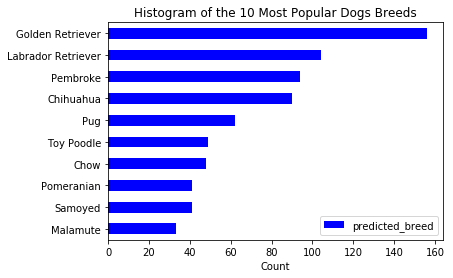

In [94]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df['predicted_breed'].value_counts()[:10])
dog_breeds.sort_values(by=['predicted_breed'], inplace=True)
dog_breeds.plot(kind='barh', color=['b']);
plt.title('Histogram of the 10 Most Popular Dogs Breeds');
plt.xlabel('Count');

Most posted dogs are Golden Retriever

Now we want to find out the stage of these dogs.

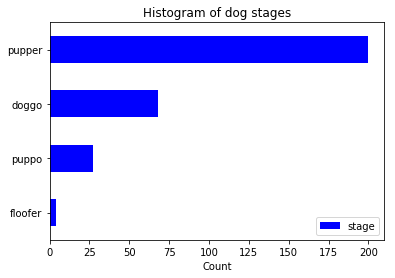

In [95]:
# plot dog types
dog_stage = pd.DataFrame(df['stage'].value_counts())
dog_stage.sort_values(by=['stage'], inplace=True)
dog_stage.plot(kind='barh', color=['b']);
plt.title('Histogram of dog stages');
plt.xlabel('Count');

Most posted dogs are "pupper"

Finally we have a look at the names of these dogs.

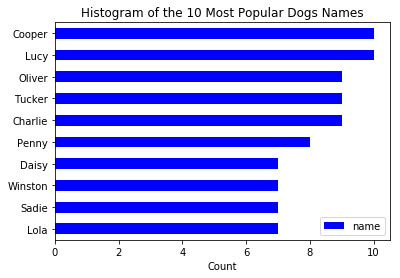

In [96]:
# plot 10 most popular dog names
name = pd.DataFrame(df['name'].value_counts()[1:11])
name.sort_values(by=['name'], inplace=True)
name.plot(kind='barh', color=['b']);
plt.title('Histogram of the 10 Most Popular Dogs Names');
plt.xlabel('Count');

Some common dog names are Cooper, Charlie, Daisy and tucker.

#### Summary Insight 1:
So it seems most most dogs are Golden Retriever in a doggo stage and are either named Cooper und Lucy.

### Insight 2: Twitter Account actions

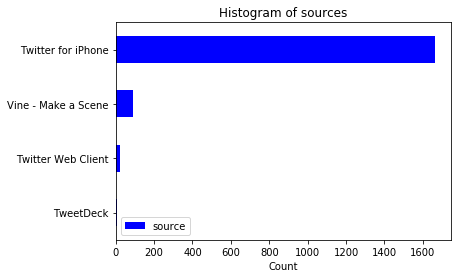

In [97]:
# plot sources
source = pd.DataFrame(df['source'].value_counts())
source.sort_values(by=['source'], inplace=True)
source.plot(kind='barh', color=['b']);
plt.title('Histogram of sources');
plt.xlabel('Count');

#### Summary Insight 2:
Most tweets are made on an iphone.

### Insight 3: Twitter Account reactions

Text(0,0.5,'Favorites')

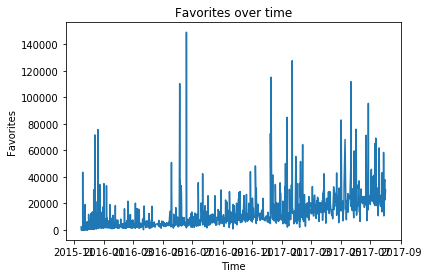

In [98]:
plt.plot(df.timestamp,df.favorites)

plt.title("Favorites over time")
plt.xlabel('Time')
plt.ylabel('Favorites')

There are some spikes in number of favourites. The avarage number of favourites seems to grow steadily.

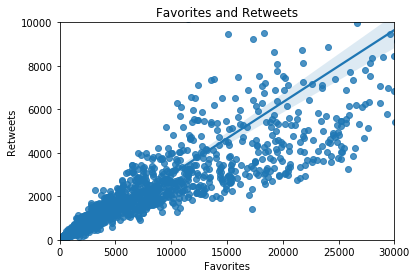

In [101]:
sns.regplot(x=df.favorites, y=df.retweets)
plt.title("Favorites and Retweets")
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.xlim([0,30000]);
plt.ylim([0,10000]);

For about every 3.5 favorities 1 retweet is made.

#### Summary Insight 3:
The twitter account popularity seems to grow steadily. More people set a favourite than a retweet. (About factor 3)